# Project 2019 - Programming for Data Analysis

# Simulation Dataset - Installed Base Dataset

## Introduction
The following assignment concerns the numpy.random package in Python 3. I have created a Jupyter notebook explaining the use of the package, including detailed explanations of six of the distributions provided for in the package.

## Problem statement

The objective of this project is to create a data set by simulating a real-world phenomenon, of my choosing.

* Instead of collecting data, I model and synthesise the data using Python packages, such as numpy.random.

Specifically, in this project you should:

* I simulate two hundred data points across four different variables.
* I investigate the types of variables involved, their likely distributions, and their relationships with each other.
* I simulate a data set as closely matching their properties as possible.
* I detail my research and implement the simulation in a Jupyter notebook 
* The final dataset itself is displayed in an output cell within the notebook.



## About My Dataset
The objective of my dataset is to simulate typical data about a companys installed base. According to Kurvinen (2017), the typical data on install base includes a listing of products which are installed at a given customer site. Futhermore, it can include additional variables such as serial numbers, hardware and software revisions, warranty and service contracts. 

Installed base data can be used by many departments in an organisation, from field service engineers, sales, spare parts planners, quality etc . The dataset helps to answer questions such as:

* What is the current configuration of the product to be serviced?
* Where is the faulty product physically located and where is the part to be replaced located?
* Is the unit covered under warranty or service contract?
* When was the unit installed, upgraded and/or last serviced?

![Install Base Image](https://cdn.myonlinestore.eu/945f2dab-6be1-11e9-a722-44a8421b9960/images/World%20map%20installed%20base.png)

## Basic Description of the Dataset

The dataset contains the following data

1. Part Number: 5 Digit identifier for each product installed. 
2. Serial Numbers: Unique ID's for each unit sold. There are 200 serial numbers.
3. Installation Date: Assume all units sold require a start-up / installation by a field service engineer, who records this date on the company CRM system (Saleforce.com). The dataset was created in January 2017 and spans 36 months.
4. Factory Warranty Expiration Date: Factory Warranty usually expires 1 year after installation.
5. Extended Warranty: Number of years of extended warranty cover purchased.
6. 

## Variables Types
 
 1. Python Objects  
 Serial numbers are usually unique alphanumeric strings, usually of a fixed length, so I decided to use UUID function in python to generate random unique ID's which have similar properties to serial numbers. The UUID module provides "immutable UUID objects (the UUID class) and the functions uuid1(), uuid3(), uuid4(), uuid5() for generating version 1, 3, 4, and 5 UUIDs as specified in RFC 4122" (The Python Foundation, 2019). The dtype used to store these objects, is Python Object.   
 
 2. datetime64
 Datetime64 is a NumPy data types which support datetime functionality (The Scipy Community, 2017). This datatype will be used to store datetime variables 'install date' & 'factory warranty'.
 
 3. Int32
 This datatype is a 32bit integer, which will be used for variable 'extended warranty'.
 
 

## 1. Defining the main parameters

I begin by importing all the necessary dependencies and defining the main parameters mentioned above (200 serial number, 36 months, starting month in January 2017).

In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import uuid
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
# Define the main parameters dataset. 

# number of serial numbers which are contained in the install base dataset
num_serial_num = 200

# number of months since first unit was installed
num_months = 36

# starting month when units first installed
start_month = '2017-01-01'

## 2. Simulate List of Part Numbers
Part numbers can be classified as categorical data. 

Typically, any data attribute which is categorical in nature represents discrete values which belong to a specific finite set of categories or classes. These are also often known as classes or labels in the context of attributes or variables which are to be predicted by a model (popularly known as response variables). These discrete values can be text or numeric in nature (or even unstructured data like images!). There are two major classes of categorical data, nominal and ordinal.
In any nominal categorical data attribute, there is no concept of ordering amongst the values of that attribute. Consider a simple example of weather categories, as depicted in the following figure. We can see that we have six major classes or categories in this particular scenario without any concept or notion of order (windy doesn’t always occur before sunny nor is it smaller or bigger than sunny). Sarkar, 2018

In [3]:
# Use NumPy Random Randint Function to generate 200 random part numbers

# 5 Digit Part Numbers with ID # in range of 10000 to 99999
low, high, size = (10000 , 99999 , 200) # Define parameters for numpy.random.randint() function

np.random.seed(2) # use random seed generator

# Create a Pandas Dataframe - # solution adapted from https://stackoverflow.com/a/23671779
# Create 2D array of 200 sets of 5 numbers
parts = pd.DataFrame(np.random.randint(low, high, size), columns=['parts'])
# Display first 5 rows
parts.head()

,parts
0,99256
1,82173
2,54566
3,41019
4,94434


## 3. Create Serial Numbers
One last option for generating a random token is the uuid4() function from Python’s uuid module. A UUID is a Universally Unique IDentifier, a 128-bit sequence (str of length 32) designed to “guarantee uniqueness across space and time.”

In [4]:
# generating 200 serial numbers using UUID function
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# create an 1D array called serial, using uuid4 function to generate 200 random UUID. 
serial = pd.Series([str(uuid.uuid4()) for i in range(0,num_serial_num)])
# create 2D dataframe called installbase and insert array serial
installbase = pd.DataFrame()
# insert array serial into installbase dataframe
installbase['serial number'] = pd.Series(serial)
# display dataframe (scrolling)
installbase


,serial number
0,3ccb2211-6518-4756-a70d-2abfee63e0d4
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8
3,81d1d0f0-5319-47e3-bda6-30c6da058860
4,a7440a09-f8c1-49e0-a42b-45207ac316cc
5,f48ff3d7-0777-4f54-b938-28c02cc43672
6,1225066f-bb82-4625-a13c-fbfcee858e16
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060
8,ef1663a0-905f-44ec-847d-311b7ee49b34
9,6946a70a-6f02-4942-a47f-0e30ad697288


In [5]:
# Adding part number column to the dataframe using pandas concat function
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# Combine 2 pandas series in the dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['part number'] = pd.concat([parts], axis=0).reset_index().drop('index', 1)
installbase

,serial number,part number
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434
5,f48ff3d7-0777-4f54-b938-28c02cc43672,43867
6,1225066f-bb82-4625-a13c-fbfcee858e16,90232
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060,54295
8,ef1663a0-905f-44ec-847d-311b7ee49b34,63922
9,6946a70a-6f02-4942-a47f-0e30ad697288,43201


The output is a dataframe 200 rows and two columns, serial number and part number. 

## 4. Generating Installation Date

I use the pandas.to_datetime function to output a range of datetime values which simulate a range of installation dates. Then I select a random sample of these dates to populate the dataset using np.random.choice function.

In [6]:
# Create Date Range using the specified parameters (starting month, number of months).
# Adapted from https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d

# reseting the index without inserting it as a column in the new DataFrame - https://www.geeksforgeeks.org/python-pandas-series-reset_index/
installbase = installbase.reset_index().drop('index', 1)

# defining range of installation dates: starting month 
start_month_ts = pd.to_datetime(start_month)
# define end month as start month plus 36 months, using relativedata utility https://dateutil.readthedocs.io/en/stable/relativedelta.html
end_month_ts = start_month_ts + relativedelta(months=+num_months - 1)

# making a Series out of the starting and ending month
months = pd.Series(pd.date_range(start_month_ts, end_month_ts, freq='MS'))
# Display start and end month
str(start_month_ts), str(end_month_ts)

('2017-01-01 00:00:00', '2019-12-01 00:00:00')

This argument uses the specified parameters (starting month, number of months) to generate a range of dates from January 2017 to December 2019.

In [7]:
# Select random installation dates from range of dates created above

# use random seed generator
np.random.seed(2) # use random seed generator
# create a series called installdate whoch contain 200 dates chosen at random from  the daterange "months" using random.choice() function 
installdate = pd.Series(np.random.choice(months, size=num_serial_num))
# display first 5 rows
installdate.head()

0   2018-04-01
1   2017-09-01
2   2018-11-01
3   2018-07-01
4   2017-12-01
dtype: datetime64[ns]

In [8]:
#  Adding installdate column to the dataframe

# Combine installdate series into the installbase dataframe, resetting the index without inserting it as a column in the new DataFrame.
installbase['install date'] = pd.concat([installdate] * num_serial_num, axis=0).reset_index().drop('index', 1)
#diplay the dataframe
installbase

,serial number,part number,install date
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256,2018-04-01
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173,2017-09-01
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566,2018-11-01
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019,2018-07-01
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434,2017-12-01
5,f48ff3d7-0777-4f54-b938-28c02cc43672,43867,2017-08-01
6,1225066f-bb82-4625-a13c-fbfcee858e16,90232,2019-11-01
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060,54295,2019-08-01
8,ef1663a0-905f-44ec-847d-311b7ee49b34,63922,2017-12-01
9,6946a70a-6f02-4942-a47f-0e30ad697288,43201,2018-10-01


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]), <a list of 10 Text xticklabel objects>)

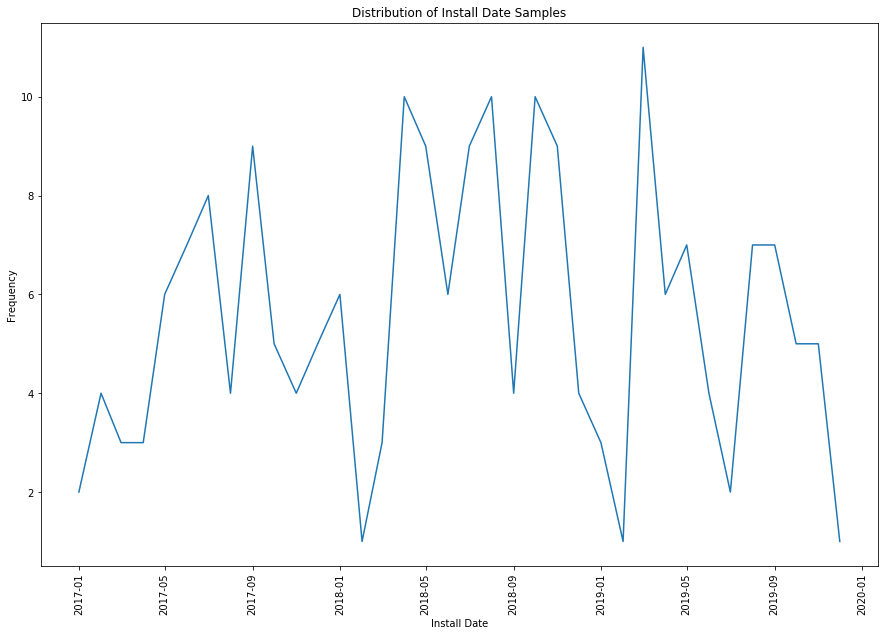

In [9]:
df = installbase.groupby(['install date']).count() # Adapted from McKinney 2019
# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))
plt.title('Distribution of Install Date Samples') # Plot Title
plt.xlabel('Install Date') # Label x Axis 
plt.ylabel('Frequency') # Label y Axis 
plt.plot(df['serial number'])
plt.xticks(rotation='vertical')

In [10]:
factorywarrantyexpiry = (installdate + np.timedelta64(1, 'Y'))
factorywarrantyexpiry

0     2019-04-01 05:49:12
1     2018-09-01 05:49:12
2     2019-11-01 05:49:12
3     2019-07-01 05:49:12
4     2018-12-01 05:49:12
5     2018-08-01 05:49:12
6     2020-10-31 05:49:12
7     2020-07-31 05:49:12
8     2018-12-01 05:49:12
9     2019-10-01 05:49:12
10    2020-07-31 05:49:12
11    2020-02-29 05:49:12
12    2019-09-01 05:49:12
13    2018-04-01 05:49:12
14    2018-05-01 05:49:12
15    2020-09-30 05:49:12
16    2018-04-01 05:49:12
17    2018-06-01 05:49:12
18    2020-01-01 05:49:12
19    2018-05-01 05:49:12
20    2018-07-01 05:49:12
21    2020-07-31 05:49:12
22    2019-08-01 05:49:12
23    2020-07-31 05:49:12
24    2018-03-01 05:49:12
25    2019-05-01 05:49:12
26    2019-01-01 05:49:12
27    2018-05-01 05:49:12
28    2020-02-29 05:49:12
29    2019-04-01 05:49:12
              ...        
170   2019-10-01 05:49:12
171   2019-08-01 05:49:12
172   2018-05-01 05:49:12
173   2020-10-31 05:49:12
174   2019-01-01 05:49:12
175   2019-04-01 05:49:12
176   2019-10-01 05:49:12
177   2018-0

In [11]:
installbase['factory warranty'] = pd.concat([factorywarrantyexpiry], axis=0).reset_index().drop('index', 1)
installbase.head()

,serial number,part number,install date,factory warranty
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256,2018-04-01,2019-04-01 05:49:12
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173,2017-09-01,2018-09-01 05:49:12
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566,2018-11-01,2019-11-01 05:49:12
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019,2018-07-01,2019-07-01 05:49:12
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434,2017-12-01,2018-12-01 05:49:12


In [12]:
# Customer have a choice of not taking out extended warranty or purchasing an additional 1, 2 or 3 year extended warranty
num_warranty = 3  

# assign extended warranty to users randomly (when did the user first use the product?)
warranty = pd.DataFrame()

np.random.seed(2) # use random seed generator

warranty['warranty extension'] = np.random.randint(low=0, high=num_warranty, size=num_serial_num)
warranty.sample(5)



,warranty extension
55,2
70,1
131,0
193,0
124,1


In [13]:
installbase['extended warranty'] = pd.concat([warranty], axis=0).reset_index().drop('index', 1)
installbase

,serial number,part number,install date,factory warranty,extended warranty
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256,2018-04-01,2019-04-01 05:49:12,0
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173,2017-09-01,2018-09-01 05:49:12,1
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566,2018-11-01,2019-11-01 05:49:12,0
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019,2018-07-01,2019-07-01 05:49:12,2
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434,2017-12-01,2018-12-01 05:49:12,2
5,f48ff3d7-0777-4f54-b938-28c02cc43672,43867,2017-08-01,2018-08-01 05:49:12,0
6,1225066f-bb82-4625-a13c-fbfcee858e16,90232,2019-11-01,2020-10-31 05:49:12,2
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060,54295,2019-08-01,2020-07-31 05:49:12,1
8,ef1663a0-905f-44ec-847d-311b7ee49b34,63922,2017-12-01,2018-12-01 05:49:12,1
9,6946a70a-6f02-4942-a47f-0e30ad697288,43201,2018-10-01,2019-10-01 05:49:12,2


## 4 Customer ID Number
One other possible way to get a discrete distribution that looks like the normal distribution is to draw from a multinomial distribution where the probabilities are calculated from a normal distribution. https://stackoverflow.com/a/37412692

4.1. Generating categorical feature weights
Defining weights for the likelihood of a categorical feature associated with an individual unit.

C:\Users\SESA87346\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Numbers')

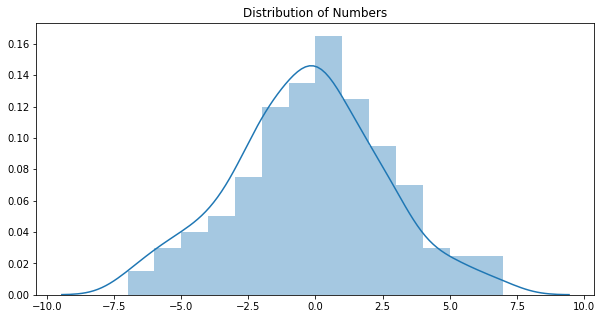

In [14]:
# Solution adapted from https://stackoverflow.com/a/37412692

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
# nums = np.random.choice(x, size = 200, p = prob)

np.random.seed(2) # use random seed generator

nums = pd.DataFrame(np.random.choice(x, size = 200, p = prob))
# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
#plt.hist(nums, bins = len(x))
sns.distplot(pd.DataFrame(nums)).set_title('Distribution of Numbers')

np.random.choice picks an integer from [-10, 10]. The probability for selecting an element, say 0, is calculated by p(-0.5 < x < 0.5) where x is a normal random variable with mean zero and standard deviation 3. I chooce std. dev. as 3 because this way p(-10 < x < 10) is almost 1.

Text(0.5, 1.0, 'Distribution of Customer ID Numbers')

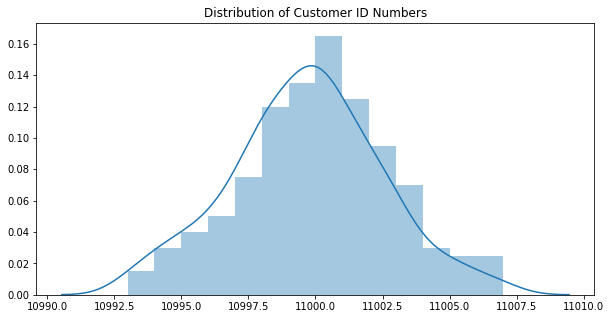

In [15]:
# Convert 1D array to 2D Dataframe
nums = pd.DataFrame(nums)
# create new dataframe custid which is a 5 digit integer. The value is assigned by adding the variable nums to the integer 11000
# This gives a distribution of customer id's
custid= pd.DataFrame((11000+(nums)).astype(int))

# Create a figure to visualize the distribution
plt.subplots(figsize=(10,5))

# Plot histogram of dataframe using seaborn distplot function
sns.distplot(pd.DataFrame(custid)).set_title('Distribution of Customer ID Numbers')

In [16]:
installbase['cust id'] = pd.concat([custid], axis=0).reset_index().drop('index', 1)
installbase

,serial number,part number,install date,factory warranty,extended warranty,cust id
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256,2018-04-01,2019-04-01 05:49:12,0,11000
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173,2017-09-01,2018-09-01 05:49:12,1,10994
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566,2018-11-01,2019-11-01 05:49:12,0,11000
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019,2018-07-01,2019-07-01 05:49:12,2,11000
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434,2017-12-01,2018-12-01 05:49:12,2,10999
5,f48ff3d7-0777-4f54-b938-28c02cc43672,43867,2017-08-01,2018-08-01 05:49:12,0,10999
6,1225066f-bb82-4625-a13c-fbfcee858e16,90232,2019-11-01,2020-10-31 05:49:12,2,10998
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060,54295,2019-08-01,2020-07-31 05:49:12,1,11001
8,ef1663a0-905f-44ec-847d-311b7ee49b34,63922,2017-12-01,2018-12-01 05:49:12,1,10998
9,6946a70a-6f02-4942-a47f-0e30ad697288,43201,2018-10-01,2019-10-01 05:49:12,2,10998


In [17]:
installbase['country'] = pd.concat([nums], axis=0).reset_index().drop('index', 1)
installbase

,serial number,part number,install date,factory warranty,extended warranty,cust id,country
0,3ccb2211-6518-4756-a70d-2abfee63e0d4,99256,2018-04-01,2019-04-01 05:49:12,0,11000,0
1,12ac7b5a-097d-4e7e-8407-26b2d8ba16ab,82173,2017-09-01,2018-09-01 05:49:12,1,10994,-6
2,c12b601d-0f05-44c8-bdc1-99fcfe72f5a8,54566,2018-11-01,2019-11-01 05:49:12,0,11000,0
3,81d1d0f0-5319-47e3-bda6-30c6da058860,41019,2018-07-01,2019-07-01 05:49:12,2,11000,0
4,a7440a09-f8c1-49e0-a42b-45207ac316cc,94434,2017-12-01,2018-12-01 05:49:12,2,10999,-1
5,f48ff3d7-0777-4f54-b938-28c02cc43672,43867,2017-08-01,2018-08-01 05:49:12,0,10999,-1
6,1225066f-bb82-4625-a13c-fbfcee858e16,90232,2019-11-01,2020-10-31 05:49:12,2,10998,-2
7,f2a9aa6f-ef64-4362-b8fc-3bba4eb98060,54295,2019-08-01,2020-07-31 05:49:12,1,11001,1
8,ef1663a0-905f-44ec-847d-311b7ee49b34,63922,2017-12-01,2018-12-01 05:49:12,1,10998,-2
9,6946a70a-6f02-4942-a47f-0e30ad697288,43201,2018-10-01,2019-10-01 05:49:12,2,10998,-2


In [18]:
# Use dataframe replace to replace string value with numeric value in Day Number column - 
# Adapted from https://stackoverflow.com/a/17115229

# Define mapping between strings and number values 
mapping = {-7: "IE", -6: "PT", -5: "ES", -4: "IT",-3: "CH", -2: "AT",
                         -1: "GB", 0: "FR", 7: "NO", 6: "SE", 5: "FI", 4: "DK", 3: "NL", 2: "BE", 1: "DE"}
# create new dataframe called df2 and use df.replace to replace values in Day Number column using mapping 
df2 = installbase.replace({'country': mapping})
# display a sample 5 rows displaying new column 'Day Number'
df2.sample(5)


,serial number,part number,install date,factory warranty,extended warranty,cust id,country
180,379bc0c2-4df7-4ca3-8f06-5f7366ae38ba,38028,2018-06-01,2019-06-01 05:49:12,0,10999,GB
198,dfa36ffb-f70f-4f2f-9f6b-12d8b5ba3d07,53052,2017-05-01,2018-05-01 05:49:12,1,11004,DK
165,3827fd47-0626-46dd-8221-b5ba6560cd19,26682,2018-05-01,2019-05-01 05:49:12,0,11005,FI
84,4fa14b95-0812-4097-a6d4-2b88ff2b9106,55002,2017-10-01,2018-10-01 05:49:12,1,11000,FR
175,1d418c25-bcec-467a-be73-3e1747b6965d,87139,2018-04-01,2019-04-01 05:49:12,0,11002,BE


In [19]:
# Defining the variables
platforms = ['iOS', 'Android']
countries = ['IE', 'GB', 'NL', 'FR', 'DE', 'BE', 'DK']
service_contract = [False, True]

## References
1. Kurvinen, M (2017) *INSTALLED BASE AND TRACEABILITY* [Online] Available at: http://sd-ize.com/installed-base.html[Accessed 1 December 2019].
2. Python Software Foundation (2019) *UUID objects according to RFC 4122* [Online] Available at https://docs.python.org/2/library/uuid.html [Accessed 1 December 2019]
3. Osolnik, J (2017) *Simulating product usage data with Pandas* [Online] Available at https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d [Accessed 1 December 2019]
4. The Scipy Community (2017) *Datetimes and Timedeltas* [Online] Available at https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html [Accessed 3 December 2019]
5. Sarkar, D (2018) *Categorical Data* [Online] Available at: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63 [Accessed 21 November 2019].
6. Solomon, B (2018) *Generating Random Data in Python (Guide)* [Online] Available at: https://realpython.com/python-random/ [Accessed 7 December 2019]

